## Question: Did the Covid lockdowns impact upon levels of reported crime?  
The Office for National Statistics (ONS) have produced a report which includes the findings of a national telephone survey. When asked about the impact of Covid lockdowns on levels of crime a not insubstantial number of participants stated that thye thought that while national crime levels had dropped the levels of 'local' crime has remained the same. 

To test whether this perception was correct you have decided to compare level of crime reported **nationally** to levels of crime reported **locally** for a **specified period of time**.  

### Collect relevant data from 'Data.Police.Org' website  


### 1: Retrieve 'all' files  
Each sub directory contains 3 files:
- *year-month-*county-outcomes.csv
- *year-month-*county-stop-and-search.csv
- *year-month-*county-street.csv
 

### Before collecting data from an archive - do we need all of the data files?  
Using the following code we can extract data files form a compressed 'zip'file located in an API.  
- URL: https://data.police.uk/data/archive/2021-12.zip (you can choose a different time period if you believe this will be more relevant)  
- target directory: police_data located in the current working directory  

As we are collecting all of the available data files this operation may take a few moments.  

In [ ]:
from importlib import reload
import Functions
reload(Functions)

In [ ]:
import requests
import zipfile
import os
import io
from datetime import datetime
import pandas as pd

from Functions import *

## Collect data from **URL**  

In [ ]:
from Functions import download_and_filter_subdirectories

# Parameters required:

# URL of the archive zip file
archive_url = 'https://data.police.uk/data/archive/2021-12.zip'

# Directory to save extracted files
output_directory = './police_data'

# Date range for filtering subdirectories
start_date = datetime(2020, 3, 1)
end_date = datetime(2021, 3, 31)

# Execute the function
download_and_filter_subdirectories(archive_url, output_directory, start_date, end_date)

print(f"Data for the specified range has been extracted to: {output_directory}")

### National Data Collected  
Retrieving all of this data is time consuming and will require a storage space of **2.74GB**.  
The time taken to download and storage required could be reduced by considering which data do we actually require?  
Do we require all of the following files?:  
- *year-month-*county-outcomes.csv  
- *year-month-*county-stop-and-search.csv  
- *year-month-*county-street.csv

To decide which files you require we can investigate the information contained within the first 3 files in the directory for March 2020 (2020-03):  
- '2020-03-avon-and-somerset-outcomes.csv'  
- '2020-03-avon-and-somerset-stop-and-search.csv'  
- '2020-03-avon-and-somerset-street.csv'  

#### File information - 'outcomes'  

In [ ]:
file_information_outcomes = pd.read_csv('police_data/2020-03/2020-03-avon-and-somerset-outcomes.csv')
file_information_outcomes.head(2)

#### File information - 'stop-and-search'  

In [ ]:
file_information_stop_and_search = pd.read_csv('police_data/2020-03/2020-03-avon-and-somerset-stop-and-search.csv')
file_information_stop_and_search.head(2)

#### File information - 'street'  

In [ ]:
file_information_street = pd.read_csv('police_data/2020-03/2020-03-avon-and-somerset-street.csv')
file_information_street.head(2)

### 2: Retrieve files with 'street' in title (national)  
#### Which set of data will you investigate?  
In this case we have opted to investigate crimes reported at 'street' level. We will retrieve files for the specified data range and inlude the text 'street' in the filename.  

Note - as with the previous data collection we are retrieving data from a URL so this may take a little time.    

In [ ]:
from Functions import download_and_filter_street_files

# URL of the archive zip file
archive_url = 'https://data.police.uk/data/archive/2021-12.zip'

# Directory to save extracted files
output_directory = 'police_data_street'

# Date range for filtering subdirectories
start_date = datetime(2020, 3, 1)
end_date = datetime(2021, 3, 31)

# Execute the function
download_and_filter_street_files(archive_url, output_directory, start_date, end_date)

print(f"Data with '-street' in the title has been extracted to: {output_directory}")

#### Selecting specific files  
By selecting the files with the text 'street' in the filename the storage required has dropped from **2.74GB** to **1.47GB**.  

### 3. How many record in each month? (national)  
Having collected data for crimes reported at 'street' level, how many crimes in total were recorded per month nationally?  

As the data has been collected we can retrieve data from the local file instead of a URL.  

To process this data we aill save the output as a '.csv' file in the current working directory.  

In [ ]:
from Functions import count_records_per_month

# Define the base directory where the downloaded data is stored

import pandas as pd

base_directory = 'police_data_street'

# Output CSV file path
output_csv_file = '1. national_records_per_month(all_crime_types).csv'

# Get the record counts
record_counts = count_records_per_month(base_directory)

# Convert the results to a DataFrame and save to CSV
df = pd.DataFrame(record_counts)
df.sort_values(by='Month', inplace=True)  # Sort by month
df.to_csv(output_csv_file, index=False)

#print(f"Records per month have been saved to: {output_csv_file}")

#### National monthly sum of all reported crimes  

In [ ]:
national = pd.read_csv('1. national_records_per_month(all_crime_types).csv')
national

### 4. Monthly sum for specific crime (national)   
We might decide that to give a better indication of the possible impact of a Covid Lockdown on levels of reported crime we will look at specific crimes.  
Crime types:
- 'Violence and sexual offences'
- 'Bicycle theft', 'Other theft'
- 'Shoplifting'
- 'Anti-social behaviour'
- 'Burglary'
- 'Criminal damage and arson'
- 'Drugs'
- 'Vehicle crime'
- 'Public order'
- 'Possession of weapons'
- 'Robbery'
- 'Other crime'
- 'Theft from the person'

The following code will produce a csv file which contains a breakdown of the sum of the levels for each crime-per-month nationally. The data is output to the current working directory as 'national_crime_summary_per_month.csv'. A screenshot of he sum of reports for crime types per month is shown below (there are more than 6 crime types):  

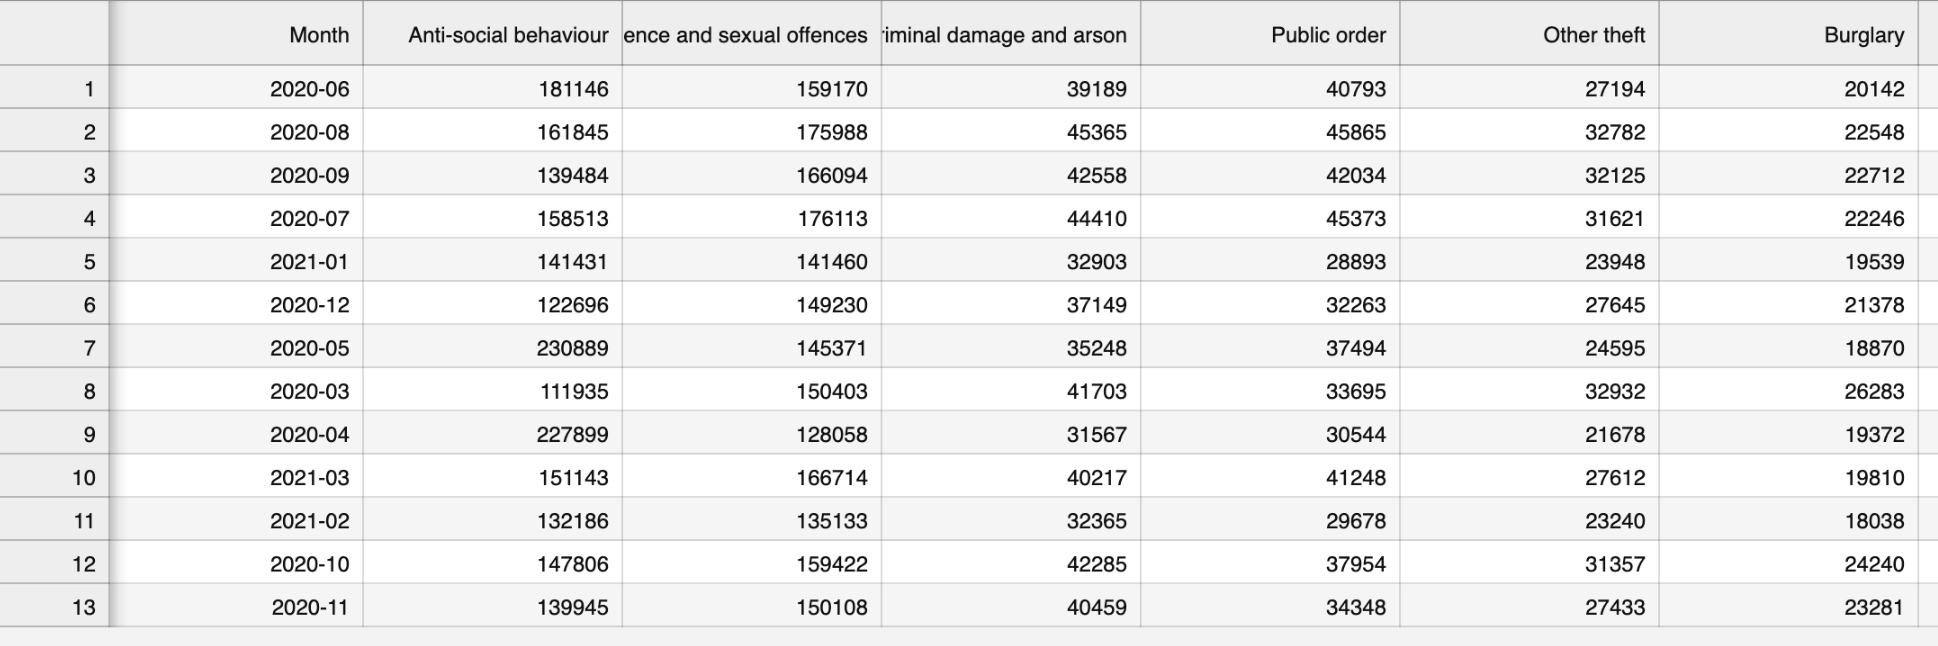

In [ ]:
from Functions import summarise_crime_types_per_month

# Define the base directory where the downloaded data is stored
base_directory = 'police_data_street'

# Output CSV file path
output_csv_file = '2. national_records_per_month(per_crime_types).csv'

# Get the crime summary
crime_summary = summarise_crime_types_per_month(base_directory)

# Save the summary to a CSV file
crime_summary.to_csv(output_csv_file, index=False)

print(f"Crime summary per month has been saved to: {output_csv_file}")

### National / Local comparison  
At this stage we have a csv file which contains the monthly crime levels reported at national level for all crimes ('national_records_per_month(all_crime_types).csv') and for specific crimes ('national_records_per_month(per_crime_types).csv').  

The next step is to collect data for a **specific county** for comparison with the national levels reported.  

The following code will retrieve data from files which contain the text 'Norfolk' in their title.  

The data retrieved will be output in '.csv' file format.  

### 5. Retrieving data by county  

In [ ]:
from Functions import aggregate_crimes_for_county_by_filename

# Define the base directory where the downloaded data is stored
base_directory = 'police_data_street'

# Define the county of interest
target_county = 'Norfolk'

# Define the date range of interest
start_date = '2020-03'
end_date = '2021-03'

# Output CSV file path
output_csv_file = '3. crime_summary_norfolk.csv'

# Get the crime summary for the county
crime_summary = aggregate_crimes_for_county_by_filename(base_directory, target_county, start_date, end_date)

# Save the summary to a CSV file
crime_summary.to_csv(output_csv_file, index=False)

print(f"Crime summary for {target_county} has been saved to: {output_csv_file}")


The resulting data file contains a sum of levels of reported crime for each month for the county of Noroflk.  

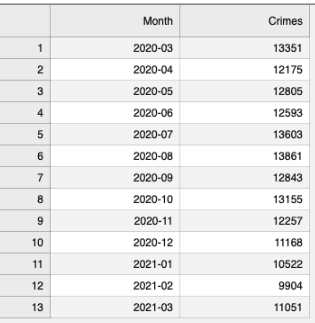

### 6. Crime levels reported by County by Crime type  
Having determined the overall crime levels reported in Norfolk we can break this down to levels of crime reported by crime type and output the file in '.csv' format so that we can process the data.  

In [ ]:
from Functions import analyse_crime_by_type_per_month

# Define the base directory where the downloaded data is stored
base_directory = 'police_data_street'

# Define the county of interest
target_county = 'Norfolk'

# Output CSV file path
output_csv_file = '4. crime_summary_norfolk(by_crime_type).csv'

# Analyze the crime data for the county by month and crime type
crime_summary = analyse_crime_by_type_per_month(base_directory, target_county)

# Save the summary to a CSV file
crime_summary.to_csv(output_csv_file, index=False)

print(f"Crime summary by type per month for {target_county} has been saved to: {output_csv_file}")

The resulting data file contains a sum of levels of reported crime for each month and each crime by type for the county of Noroflk.   

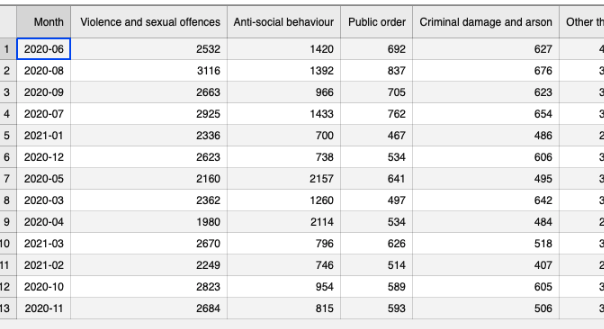  

N.B. The records are not in any order, you may wish to group the data using a 'df.groupby()' as shown in the following code. 

In [ ]:
data1 = pd.read_csv('4. crime_summary_norfolk(by_crime_type).csv')
data1 = data1.sort_values(['Month'])
data1.reset_index(drop=True, inplace=True)
data1

### 7. 'Local' Relevance  
To make the findings more relevant to the question of comparison between 'local' and national data we can look at the data for a specific loacation e.g. Norwich.  

In [ ]:
from Functions import aggregate_crimes_by_lsoa

# Define the base directory where the downloaded data is stored
base_directory = 'police_data_street'

# Define the text to search for in the 'LSOA name' column
search_text = 'Norwich'

# Output CSV file path
output_csv_file = '5. crime_summary_norwich.csv'

# Get the crime summary for LSOA names containing the text "Norwich"
crime_summary = aggregate_crimes_by_lsoa(base_directory, search_text)

# Save the summary to a CSV file
crime_summary.to_csv(output_csv_file, index=False)

print(f"Crime summary for LSOA names containing '{search_text}' has been saved to: {output_csv_file}")

### 'Local' data by crime  
Having determined the levels of reported crime for a specific location e.g. Norwich we can 'drill down' into the data to find the levels for specific crimes.  

The following code will provide a numerical summary *for all* of the different crime types for Norwich

In [ ]:
reload(Functions)

### Summary Crimes by types per month Norwich  
To be of use we might wish to see the summary by crime type for each month for Norwich.  

In [ ]:
from Functions import analyse_crime_by_type_per_month

# Define the base directory where the downloaded data is stored
base_directory = 'police_data_street'

# Define the text to search for in the 'LSOA name' column
search_text = 'Norwich'

# Output CSV file path
output_csv_file = '6. crime_summary_per_month_norwich(by_crime_type).csv'

# Analyze the crime data for Norwich by month and crime type
crime_summary = analyse_crime_by_type_per_month(base_directory, search_text)

# Save the summary to a CSV file
crime_summary.to_csv(output_csv_file, index=False)

print(f"Crime summary by type per month for LSOA names containing '{search_text}' has been saved to: {output_csv_file}")

## Summary - Data Collection  
In this notebook we have looked at how to:  
1. collect data from an archived, compressed (zip) file stored on a website
2. collect specific data from an archived, compressed (zip) file stored on a website
3. retrieve (national) data by month  
4. retrieve (national) data by month and by crime type
5. retrieve (local) data by county  
6. retrieve (national) data by county and by crime type
7. 'drill down' into local data to retrieve data by location e.g. Norwich
8. retrieve data for spcific location by type of crime per month

## Next Step  
The next step is to produce a visualisation based comparing relevant national and local data.